In [440]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [441]:
data = pd.read_excel('d:/Pythoning/test_task/test.xlsx', index_col=None, dtype = 
                     {
                        'Retention' : int, 'MaxLevelPassed' : int, 'User_id' : int, 'SumRevenue' : int, 'CountBuy' : int,
                     'Get_Ads' : int})

In [442]:
data.head()

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,...,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,0,46,1,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,46,2,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,3,A,0,0,18.0,15.0,14.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,4,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,5,A,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [443]:
df = data[['Retention', 'User_id', 'AB_Cohort','SumRevenue', 'CountBuy', 'Get_Ads']] # новый dataframe

In [444]:
df

,Retention,User_id,AB_Cohort,SumRevenue,CountBuy,Get_Ads
0,0,1,A,0,0,0
1,0,2,A,0,0,0
2,0,3,A,0,0,0
3,0,4,A,0,0,0
4,0,5,A,0,0,0
...,...,...,...,...,...,...
25377,0,4340,B,76,1,0
25378,0,4341,B,0,0,0
25379,1,4341,B,0,0,100
25380,2,4341,B,0,0,0


In [445]:
# кол-во пользователей по тестовым группам сделавших покупки

In [446]:
users_count  = df.groupby('AB_Cohort', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count'})

In [447]:
users_count

,AB_Cohort,users_count
0,A,12684
1,B,12698


In [448]:
users_did_b = df.query('SumRevenue > 0')\
     .groupby('AB_Cohort', as_index=False)\
    .agg({'SumRevenue':'count'})\
    .rename(columns={'SumRevenue':'users_did_bought'})

In [449]:
users_count["users_did_bought"]  = users_did_b["users_did_bought"] 

In [450]:
users_count

,AB_Cohort,users_count,users_did_bought
0,A,12684,38
1,B,12698,59


In [451]:
# Процент людей в группе сделавших покупку
users_count["Rate1"] = round(users_count.users_did_bought/users_count.users_count * 100, 2)

In [452]:
users_count

,AB_Cohort,users_count,users_did_bought,Rate1
0,A,12684,38,0.30
1,B,12698,59,0.46


In [453]:
# КОГОРТНЫЙ АНАЛИЗ

In [454]:
retention_A_group = df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count', 'Retention':'retention_day'})

In [455]:
retention_A_group

,retention_day,users_count
0,0,4317
1,1,1653
2,2,1342
3,3,1217
4,4,1153
5,5,1071
6,6,971
7,7,960


In [456]:
retention_B_group = df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count', 'Retention':'retention_day'})

In [457]:
# Retention (Удержание)

In [458]:
# День установки
users_install_B = retention_B_group[retention_B_group.retention_day == 0].users_count
users_install_A = retention_A_group[retention_A_group.retention_day == 0].users_count

In [459]:
users_install_B

0    4319
Name: users_count, dtype: int64

In [460]:
retention_B_group['users_install'] = 0
for i in retention_B_group['retention_day'].tolist():
    retention_B_group['users_install'][i] = users_install_B;

In [461]:
retention_A_group['users_install'] = 0
for i in retention_A_group['retention_day'].tolist():
    retention_A_group['users_install'][i] = users_install_A;

In [462]:
retention_A_group

,retention_day,users_count,users_install
0,0,4317,4317
1,1,1653,4317
2,2,1342,4317
3,3,1217,4317
4,4,1153,4317
5,5,1071,4317
6,6,971,4317
7,7,960,4317


In [463]:
retention_B_group["Retention"] = round(retention_B_group.users_count/retention_B_group.users_install * 100, 2 )
retention_A_group["Retention"] = round(retention_A_group.users_count/retention_A_group.users_install * 100, 2 )

Text(0, 0.5, 'Retention')

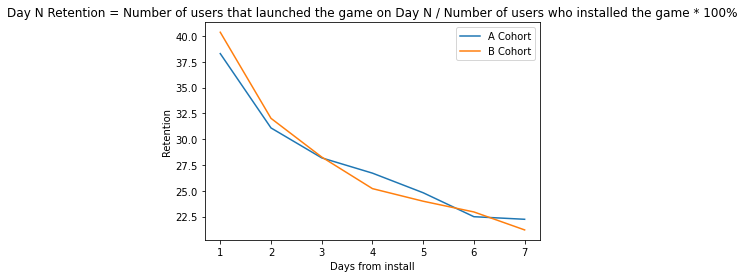

In [464]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.query("retention_day != 0").retention_day, retention_A_group.query("retention_day != 0").Retention, label='A Cohort')
plt.plot(retention_B_group.query("retention_day != 0").retention_day, retention_B_group.query("retention_day != 0").Retention, label='B Cohort')
plt.legend()
plt.title('Day N Retention = Number of users that launched the game on Day N / Number of users who installed the game * 100%')
plt.xlabel('Days from install')
plt.ylabel('Retention')

In [465]:
# ВЫВОД: Удержание стало снижаться в группе B после 3-го дня игры.

In [466]:
# ARPPU = Revenue / Paying Users

In [467]:
revenue_A_group = df.query('AB_Cohort == "A" & SumRevenue > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count', 'SumRevenue':'sum'})  \
                    .rename(columns={'User_id':'Users_paying', 'Retention':'Retention_day'})

In [468]:
revenue_B_group = df.query('AB_Cohort == "B" & SumRevenue > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count', 'SumRevenue':'sum'})  \
                    .rename(columns={'User_id':'Users_paying', 'Retention':'Retention_day'})

In [469]:
revenue_B_group

,Retention_day,Users_paying,SumRevenue
0,0,20,6726
1,1,8,4498
2,2,4,2528
3,3,8,3640
4,4,7,1122
5,5,1,189
6,6,4,2887
7,7,7,3718


In [470]:
retention_A_group["SumRevenue"] = revenue_A_group.SumRevenue.cumsum()
retention_B_group["SumRevenue"] = revenue_B_group.SumRevenue.cumsum()
retention_A_group["Users_paying"] = revenue_A_group.Users_paying
retention_B_group["Users_paying"] = revenue_B_group.Users_paying

In [477]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4317,4317,100.00,3346,11,304.18
1,1,1653,4317,38.29,4341,7,620.14
2,2,1342,4317,31.09,5086,6,847.67
3,3,1217,4317,28.19,5570,4,1392.50
4,4,1153,4317,26.71,6513,4,1628.25
5,5,1071,4317,24.81,6619,1,6619.00
6,6,971,4317,22.49,7316,2,3658.00
7,7,960,4317,22.24,8134,3,2711.33


In [472]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying
0,0,4319,4319,100.00,6726,20
1,1,1743,4319,40.36,11224,8
2,2,1383,4319,32.02,13752,4
3,3,1221,4319,28.27,17392,8
4,4,1089,4319,25.21,18514,7
5,5,1036,4319,23.99,18703,1
6,6,991,4319,22.95,21590,4
7,7,916,4319,21.21,25308,7


In [478]:
retention_A_group["ARPPU"] = round(retention_A_group.SumRevenue/retention_A_group.Users_paying, 2)
retention_B_group["ARPPU"] = round(retention_B_group.SumRevenue/retention_B_group.Users_paying, 2)

In [479]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4317,4317,100.00,3346,11,304.18
1,1,1653,4317,38.29,4341,7,620.14
2,2,1342,4317,31.09,5086,6,847.67
3,3,1217,4317,28.19,5570,4,1392.50
4,4,1153,4317,26.71,6513,4,1628.25
5,5,1071,4317,24.81,6619,1,6619.00
6,6,971,4317,22.49,7316,2,3658.00
7,7,960,4317,22.24,8134,3,2711.33


In [480]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4319,4319,100.00,6726,20,336.30
1,1,1743,4319,40.36,11224,8,1403.00
2,2,1383,4319,32.02,13752,4,3438.00
3,3,1221,4319,28.27,17392,8,2174.00
4,4,1089,4319,25.21,18514,7,2644.86
5,5,1036,4319,23.99,18703,1,18703.00
6,6,991,4319,22.95,21590,4,5397.50
7,7,916,4319,21.21,25308,7,3615.43


Text(0, 0.5, 'ARPPU')

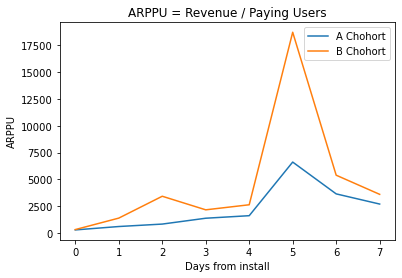

In [481]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.retention_day, retention_A_group.ARPPU, label = 'A Chohort')
plt.plot(retention_B_group.retention_day, retention_B_group.ARPPU, label = 'B Chohort')
plt.legend()
plt.title('ARPPU = Revenue / Paying Users')
plt.xlabel('Days from install')
plt.ylabel('ARPPU')

In [482]:
# ВЫВОД: Средняя доходность от одного платящего юзера в группе В выше

In [483]:
# DAU - the number of unique users per day (Daily Active Users)

In [484]:
users_A_did_buying  = df.query('AB_Cohort == "A" & SumRevenue > 0 ')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count_did_buying'})

In [485]:
retention_A_group["users_count_did_buying"] = users_A_did_buying.users_count_did_buying

In [486]:
retention_A_group["DAU"] = round(retention_A_group.users_count_did_buying/retention_A_group.users_count*100,2)

In [487]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,users_count_did_buying,DAU
0,0,4317,4317,100.00,3346,11,304.18,11,0.25
1,1,1653,4317,38.29,4341,7,620.14,7,0.42
2,2,1342,4317,31.09,5086,6,847.67,6,0.45
3,3,1217,4317,28.19,5570,4,1392.50,4,0.33
4,4,1153,4317,26.71,6513,4,1628.25,4,0.35
5,5,1071,4317,24.81,6619,1,6619.00,1,0.09
6,6,971,4317,22.49,7316,2,3658.00,2,0.21
7,7,960,4317,22.24,8134,3,2711.33,3,0.31


In [488]:
users_B_did_buying  = df.query('AB_Cohort == "B" & SumRevenue > 0 ')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'count'})  \
                    .rename(columns={'User_id':'users_count_did_buying'})

In [489]:
retention_B_group["users_count_did_buying"] = users_B_did_buying.users_count_did_buying

In [490]:
retention_B_group["DAU"] = round(retention_B_group.users_count_did_buying/retention_B_group.users_count*100,2)

In [491]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,users_count_did_buying,DAU
0,0,4319,4319,100.00,6726,20,336.30,20,0.46
1,1,1743,4319,40.36,11224,8,1403.00,8,0.46
2,2,1383,4319,32.02,13752,4,3438.00,4,0.29
3,3,1221,4319,28.27,17392,8,2174.00,8,0.66
4,4,1089,4319,25.21,18514,7,2644.86,7,0.64
5,5,1036,4319,23.99,18703,1,18703.00,1,0.10
6,6,991,4319,22.95,21590,4,5397.50,4,0.40
7,7,916,4319,21.21,25308,7,3615.43,7,0.76


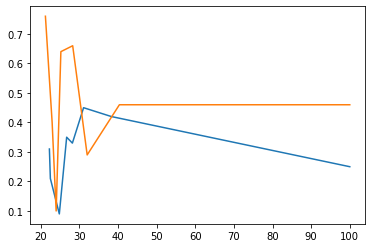

In [492]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.Retention, retention_A_group.DAU)
plt.plot(retention_B_group.Retention, retention_B_group.DAU)

In [493]:
# Средний чек

In [494]:
count_buyings_A = df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'CountBuy':'sum'})

In [495]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,users_count_did_buying,DAU
0,0,4317,4317,100.00,3346,11,304.18,11,0.25
1,1,1653,4317,38.29,4341,7,620.14,7,0.42
2,2,1342,4317,31.09,5086,6,847.67,6,0.45
3,3,1217,4317,28.19,5570,4,1392.50,4,0.33
4,4,1153,4317,26.71,6513,4,1628.25,4,0.35
5,5,1071,4317,24.81,6619,1,6619.00,1,0.09
6,6,971,4317,22.49,7316,2,3658.00,2,0.21
7,7,960,4317,22.24,8134,3,2711.33,3,0.31


In [504]:
retention_A_group["count_buyings"] = count_buyings_A.CountBuy.cumsum()

In [505]:
retention_A_group["Avg_Bill"] = round(retention_A_group.SumRevenue/retention_A_group.count_buyings,2)

In [506]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,users_count_did_buying,DAU,count_buyings,Avg_Bill
0,0,4317,4317,100.00,3346,11,304.18,11,0.25,26,128.69
1,1,1653,4317,38.29,4341,7,620.14,7,0.42,33,131.55
2,2,1342,4317,31.09,5086,6,847.67,6,0.45,41,124.05
3,3,1217,4317,28.19,5570,4,1392.50,4,0.33,49,113.67
4,4,1153,4317,26.71,6513,4,1628.25,4,0.35,56,116.30
5,5,1071,4317,24.81,6619,1,6619.00,1,0.09,58,114.12
6,6,971,4317,22.49,7316,2,3658.00,2,0.21,63,116.13
7,7,960,4317,22.24,8134,3,2711.33,3,0.31,69,117.88


In [507]:
count_buyings_B = df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'CountBuy':'sum'})

In [508]:
retention_B_group["count_buyings"] = count_buyings_B.CountBuy.cumsum()

In [509]:
retention_B_group["Avg_Bill"] = round(retention_B_group.SumRevenue/retention_B_group.count_buyings,2)

In [510]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,users_count_did_buying,DAU,count_buyings,Avg_Bill
0,0,4319,4319,100.00,6726,20,336.30,20,0.46,33,203.82
1,1,1743,4319,40.36,11224,8,1403.00,8,0.46,52,215.85
2,2,1383,4319,32.02,13752,4,3438.00,4,0.29,61,225.44
3,3,1221,4319,28.27,17392,8,2174.00,8,0.66,82,212.10
4,4,1089,4319,25.21,18514,7,2644.86,7,0.64,92,201.24
5,5,1036,4319,23.99,18703,1,18703.00,1,0.10,93,201.11
6,6,991,4319,22.95,21590,4,5397.50,4,0.40,99,218.08
7,7,916,4319,21.21,25308,7,3615.43,7,0.76,106,238.75


Text(0, 0.5, 'Avg Bill')

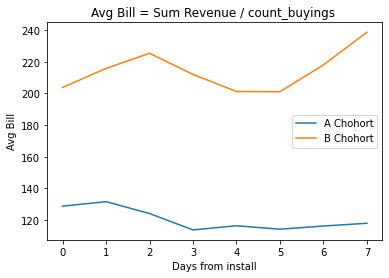

In [514]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.retention_day, retention_A_group.Avg_Bill, label = 'A Chohort')
plt.plot(retention_B_group.retention_day, retention_B_group.Avg_Bill, label = 'B Chohort')
plt.legend()
plt.title('Avg Bill = Sum Revenue / count_buyings ')
plt.xlabel('Days from install')
plt.ylabel('Avg Bill')

In [ ]:
# Среднее пройденное кол-во уровней ????

In [ ]:
# Процент пользователей просмотревших рекламу

In [515]:
users_getAds_B = df.query('AB_Cohort == "B" & Get_Ads > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'Get_Ads':'count'})  \
                    .rename(columns={'Get_Ads':'users_getAds'})

In [516]:
retention_B_group["users_getAds"] = round(users_getAds_B.users_getAds/retention_B_group.users_count*100,2)

In [517]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,users_count_did_buying,DAU,count_buyings,Avg_Bill,users_getAds
0,0,4319,4319,100.00,6726,20,336.30,20,0.46,33,203.82,4.42
1,1,1743,4319,40.36,11224,8,1403.00,8,0.46,52,215.85,14.00
2,2,1383,4319,32.02,13752,4,3438.00,4,0.29,61,225.44,13.67
3,3,1221,4319,28.27,17392,8,2174.00,8,0.66,82,212.10,14.74
4,4,1089,4319,25.21,18514,7,2644.86,7,0.64,92,201.24,13.13
5,5,1036,4319,23.99,18703,1,18703.00,1,0.10,93,201.11,13.22
6,6,991,4319,22.95,21590,4,5397.50,4,0.40,99,218.08,11.40
7,7,916,4319,21.21,25308,7,3615.43,7,0.76,106,238.75,11.46


In [518]:
users_getAds_A = df.query('AB_Cohort == "A" & Get_Ads > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'Get_Ads':'count'})  \
                    .rename(columns={'Get_Ads':'users_getAds'})

In [519]:
retention_A_group["users_getAds"] = round(users_getAds_A.users_getAds / retention_A_group.users_count * 100 ,2)

Text(0, 0.5, 'Percent Users who watched ads')

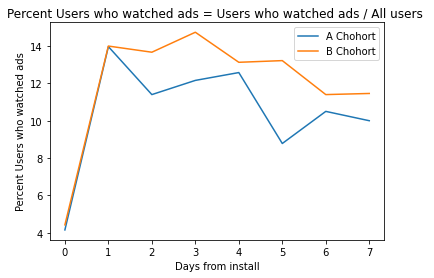

In [521]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.retention_day, retention_A_group.users_getAds, label = 'A Chohort')
plt.plot(retention_B_group.retention_day, retention_B_group.users_getAds, label = 'B Chohort')
plt.legend()
plt.title('Percent Users who watched ads = Users who watched ads / All users ')
plt.xlabel('Days from install')
plt.ylabel('Percent Users who watched ads')

In [ ]:
# Теперь нам необходимо проверить, какая из гипотез верна:
#* Нулевая гипотеза Н0 - конверсии равны.
#* Альтернативная гипотеза - конверсии не равны.

In [ ]:
# стат.критерий (p-value), Хи-квадрат

In [157]:
import statsmodels.stats.proportion as proportion

In [158]:
??proportion.proportions_chisquare

In [159]:
chi2start, pval, table = proportion.proportions_chisquare(users_count['users_did_bought'],users_count['users_count'])

In [160]:
alpha = 0.05

In [161]:
print(pval < alpha) # Можем ли мы отклонить нулевую гипотезу

True


In [ ]:
# ВЫВОД: Конверсии НЕ равны!